# Prepared by: Anas Muhammad Ashraf

In [1]:
import pandas as pd
hr = pd.read_csv('HR-data.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
#Rename column name from “sales” to “department”
hr=hr.rename(columns = {'sales':'department'})

In [3]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [4]:
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

Our data is pretty clean, no missing values

In [5]:
hr.shape

(14999, 10)

The data contains 14,999 employees and 10 features

The department column of the dataset has many categories and we need to reduce the categories for a better modeling. The department column has the following categories

In [6]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Let us combine “technical”, “support” and “IT” together and call them “technical”.

In [7]:
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

After the change, this is how the department categories look

In [8]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

# Data Exploration

First of all, let us find out the number of employees who left the company and those who didn’t:

In [9]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

There are 3571 employees left and 11428 employees stayed in our data.

Let us get a sense of the numbers across these two classes:

In [10]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Several observations:

The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.

The average monthly work hours of employees who left the company is more than that of the employees who stayed.

The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.

The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.

We can calculate categorical means for categorical variables such as department and salary to get a more detailed sense of our data like so:

In [11]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [12]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


# Data Visualization

Let us visualize our data to get a much clearer picture of the data and the significant features.

Bar chart for department employee work for and the frequency of turnover

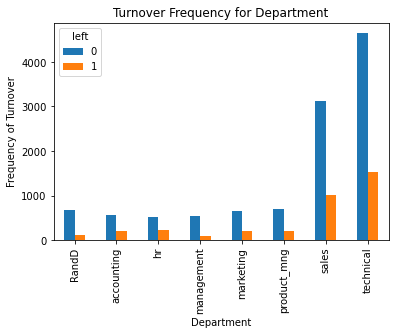

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

It is evident that the frequency of employee turnover depends a great deal on the department they work for. Thus, department can be a good predictor of the outcome variable.

Bar chart for employee salary level and the frequency of turnover

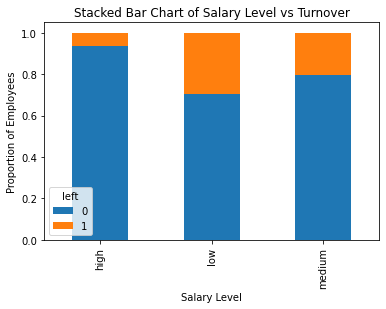

In [14]:
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

The proportion of the employee turnover depends a great deal on their salary level; hence, salary level can be a good predictor in predicting the outcome.

Histograms are often one of the most helpful tools we can use for numeric variables during the exploratory phrase.

Histogram of numeric variables

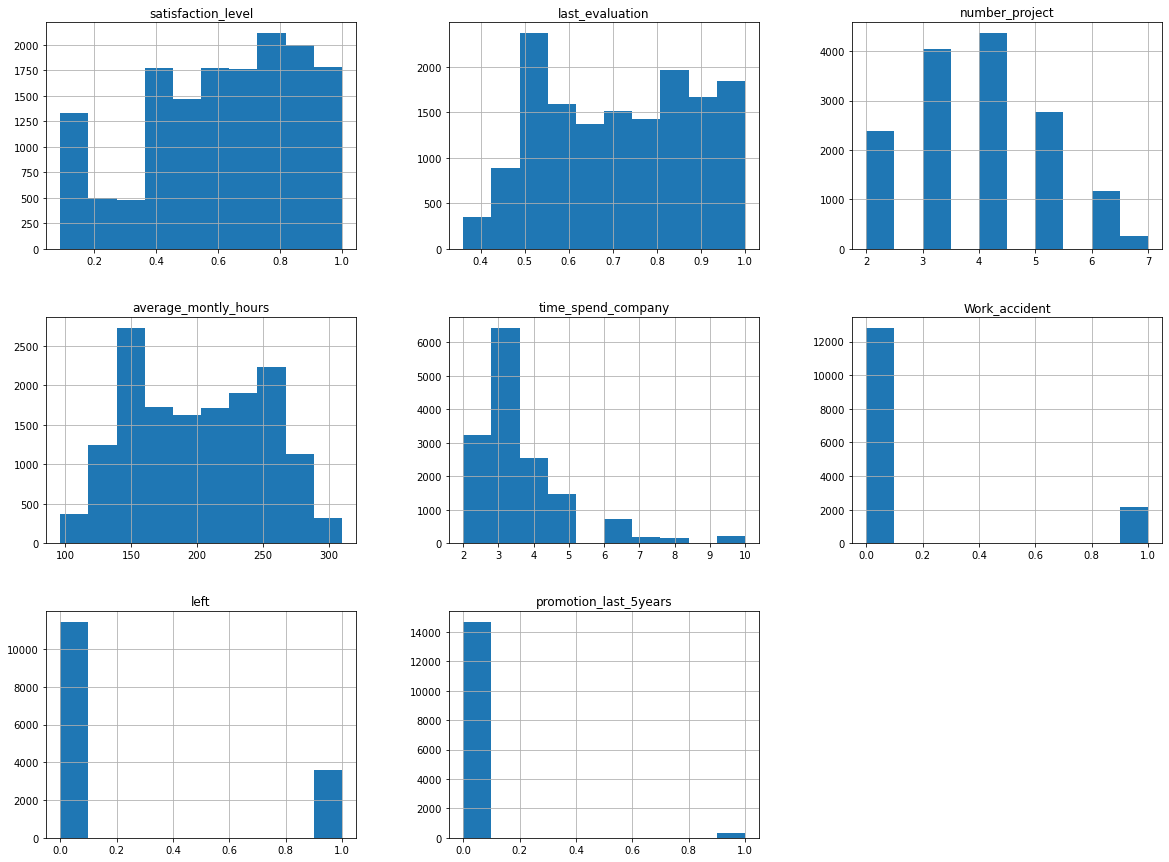

In [15]:
num_bins = 10
hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

# Satisfaction Level

Satisfaction level goes from 0 to 100

The average satisfaction level is 0.61

30% of employees are within the range 0.7-0.89

if we consider that employees are unhappy below level 50, then 30% of employees are unhappy

In [16]:
hr.satisfaction_level.describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

# Last Evaluation

This metric has the same range as Satisfaction level : goes from 0 to 100
    
The average is 0.71

It is mildly positive correlated with the number of projects and the average monthly hours, which suggests that employers who take on more projects and work longer hours tend to have better evaluations

In [17]:
hr.last_evaluation.describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

# Number of projects

On average an employer take on 3.8 projects

29% of employees take 4 projects

In [18]:
hr.number_project.describe()


count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

In [19]:
hr.number_project.value_counts()


4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

# Average montly hours

On average each employee works 201 hours a month

The maximum monthly work hours in this dataset is 310 hours and this corresponds to 18 employees

Interesting to note that all these 18 employees left the company: 9 had low salary and 9 had medium salary. None of them has had a promotion in the last 5 years.
    
Their satisfaction level was very low, although their evaluation was very high (0.83); They were doing projects above average (6.2 projects) and their time spent at the company was on average 4 years

One third of these 18 employees were working for HR

In [20]:
hr.average_montly_hours.describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [21]:
average_montly_hours_310 = hr[hr['average_montly_hours']==310]

In [22]:
average_montly_hours_310

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
566,0.11,0.79,7,310,4,0,1,0,hr,low
803,0.10,0.77,6,310,4,0,1,0,technical,medium
809,0.11,0.97,7,310,4,0,1,0,technical,medium
1059,0.70,0.93,2,310,3,0,1,0,product_mng,low
1228,0.10,0.85,7,310,5,0,1,0,marketing,low
1482,0.09,0.77,6,310,4,0,1,0,hr,low
1545,0.10,0.78,6,310,4,0,1,0,sales,medium
1578,0.10,0.96,6,310,5,0,1,0,technical,low
1596,0.36,0.48,5,310,3,0,1,0,product_mng,medium
1717,0.11,0.96,6,310,4,0,1,0,technical,low


In [23]:
average_montly_hours_310.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,18.000000,18.000000,18.000000,18.0,18.000000,18.0,18.0,18.0
mean,0.151111,0.838333,6.222222,310.0,4.000000,0.0,1.0,0.0
std,0.149819,0.120208,1.215370,0.0,0.485071,0.0,0.0,0.0
min,0.090000,0.480000,2.000000,310.0,3.000000,0.0,1.0,0.0
25%,0.100000,0.790000,6.000000,310.0,4.000000,0.0,1.0,0.0
50%,0.110000,0.815000,6.500000,310.0,4.000000,0.0,1.0,0.0
75%,0.110000,0.952500,7.000000,310.0,4.000000,0.0,1.0,0.0
max,0.700000,0.970000,7.000000,310.0,5.000000,0.0,1.0,0.0


In [24]:
average_montly_hours_310.department.value_counts()

hr             6
technical      5
product_mng    2
sales          2
accounting     2
marketing      1
Name: department, dtype: int64

# Time spent at the Company

On average employees have been in the company for 3.5 years

65% have been for 2 and 3 years

Employee Profile of who stayed longer than 10 years

There are 214 employees in this dataset that stayed longer than 10 years

Their satisfaction level is a little above average - 0.65

Also their satisfaction level is a bit higher than average - 0.73

Both the number of projects and monthly working hours taken by these employees is lower than average
29% work for management and 27% work in sales

In [25]:
hr.time_spend_company.describe()


count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

In [26]:
hr.time_spend_company.value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [27]:
time_spent_10_years = hr[hr['time_spend_company'] == 10]

In [28]:
time_spent_10_years.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
11078,0.69,0.88,3,164,10,0,0,0,management,medium
11124,0.29,0.75,6,271,10,0,0,0,sales,medium
11193,0.75,0.60,4,186,10,1,0,0,marketing,low
11194,0.61,0.89,3,242,10,0,0,0,sales,high
11195,0.47,0.79,3,284,10,0,0,0,sales,low


In [29]:
time_spent_10_years.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,214.000000,214.000000,214.000000,214.000000,214.0,214.000000,214.0,214.000000
mean,0.655327,0.731495,3.682243,199.224299,10.0,0.233645,0.0,0.074766
std,0.217827,0.157521,0.925366,47.458073,0.0,0.424141,0.0,0.263631
min,0.140000,0.370000,2.000000,108.000000,10.0,0.000000,0.0,0.000000
25%,0.530000,0.617500,3.000000,154.000000,10.0,0.000000,0.0,0.000000
50%,0.640000,0.730000,4.000000,199.000000,10.0,0.000000,0.0,0.000000
75%,0.832500,0.867500,4.000000,244.250000,10.0,0.000000,0.0,0.000000
max,0.990000,1.000000,6.000000,284.000000,10.0,1.000000,0.0,1.000000


In [30]:
time_spent_10_years.department.value_counts()

management     62
technical      62
sales          58
marketing      12
product_mng    10
accounting     10
Name: department, dtype: int64

# Work accident

In [31]:
hr.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

As one would expect, the satisfacion level on average for the employees who left the company is way below the average, at 0.44.

Only 0.5% of those employees has had a promotion in the last 5 years.

28% of them were working for sales, so turnover seems to be higher for sales people.

In this dataset, 24% of employees have left the company.

# Correlation Matrix & Heatmap

Moderate Positively Correlated Features:

projectCount vs evaluation: 0.349333

projectCount vs averageMonthlyHours: 0.417211

averageMonthlyHours vs evaluation: 0.339742

Moderate Negatively Correlated Feature:

satisfaction vs turnover(left): -0.388375

Stop and Think:

What features affect our target variable the most (turnover)?

What features have strong correlations with each other?

Can we do a more in depth examination of these features?

Summary:

From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


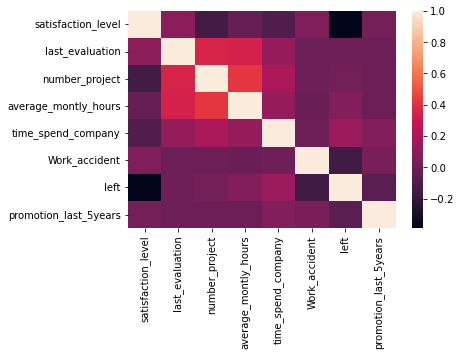

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

#Correlation Matrix
corr = hr.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

# Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

Summary: Let's examine the distribution on some of the employee's features. Here's what I found:

Satisfaction - There is a huge spike for employees with low satisfaction and high satisfaction.

Evaluation - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)

AverageMonthlyHours - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)

The evaluation and average monthly hour graphs both share a similar distribution.

Employees with lower average monthly hours were evaluated less and vice versa.

If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.

Stop and Think:

Is there a reason for the high spike in low satisfaction of employees?
Could employees be grouped in a way with these features?
Is there a correlation between evaluation and averageMonthlyHours?

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employee Count')

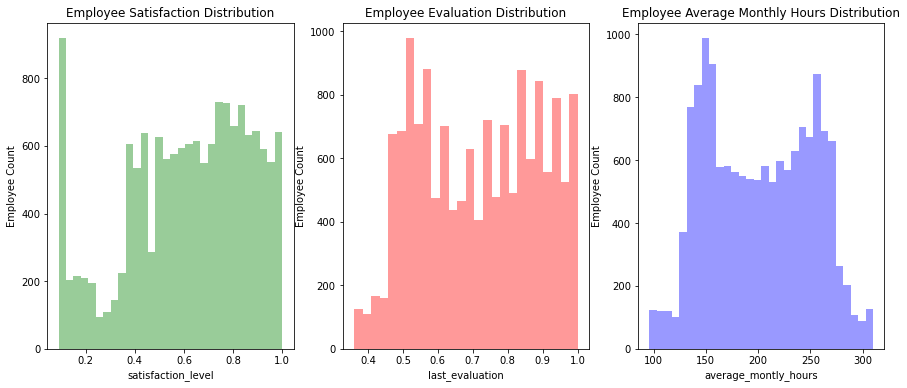

In [34]:


# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(hr.satisfaction_level, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(hr.last_evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(hr.average_montly_hours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

# Salary V.S. Turnover

Summary: This is not unusual. Here's what I found:

Majority of employees who left either had low or medium salary.

Barely any employees left with high salary

Employees with low to average salaries tend to leave the company.

Stop and Think:

What is the work environment like for low, medium, and high salaries?

What made employees with high salaries to leave?

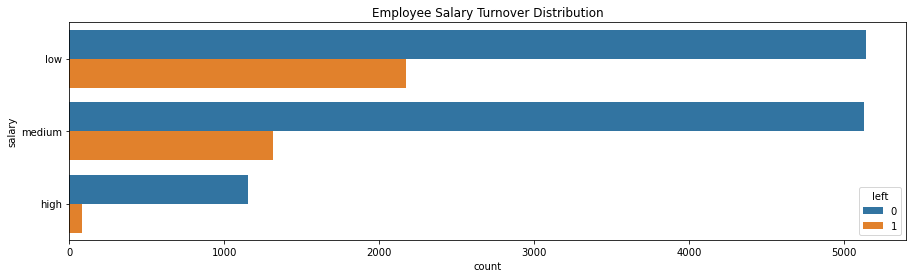

In [35]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=hr).set_title('Employee Salary Turnover Distribution');

# Department V.S. Left

Summary: Let's see more information about the departments. Here's what I found:

The sales and technical department were the top 2 departments to have employee turnover

The management department had the smallest amount of turnover

Stop and Think:

If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'management'),
  Text(5, 0, 'product_mng'),
  Text(6, 0, 'marketing'),
  Text(7, 0, 'RandD')])

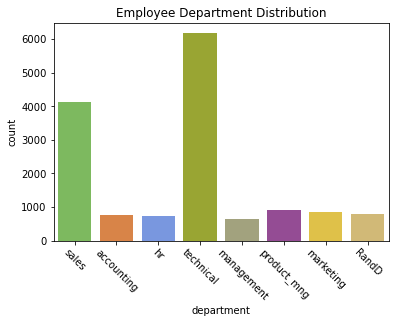

In [36]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=hr, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

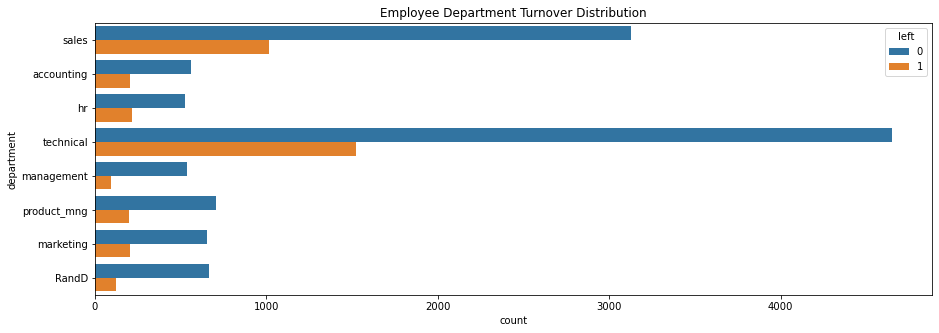

In [37]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='left', data=hr).set_title('Employee Department Turnover Distribution');

# Turnover V.S. ProjectCount

Summary: This graph is quite interesting as well. Here's what I found:

More than half of the employees with 2,6, and 7 projects left the company

Majority of the employees who did not leave the company had 3,4, and 5 projects

All of the employees with 7 projects left the company

There is an increase in employee turnover rate as project count increases

Stop and Think:

Why are employees leaving at the lower/higher spectrum of project counts?

Does this means that employees with project counts 2 or less are not worked hard enough or are not highly valued, thus leaving the company?

Do employees with 6+ projects are getting overworked, thus leaving the company?

[Text(0, 0.5, 'Percent')]

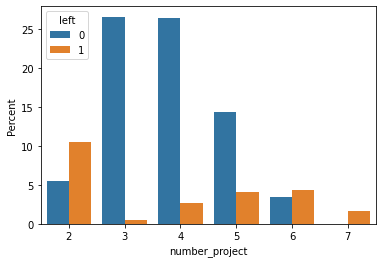

In [38]:
ax = sns.barplot(x="number_project", y="number_project", hue="left", data=hr, estimator=lambda x: len(x) / len(hr) * 100)
ax.set(ylabel="Percent")

# Turnover V.S. Evaluation

Summary:

There is a biomodal distribution for those that had a turnover.
Employees with low performance tend to leave the company more
Employees with high performance tend to leave the company more
The sweet spot for employees that stayed is within 0.6-0.8 evaluation

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

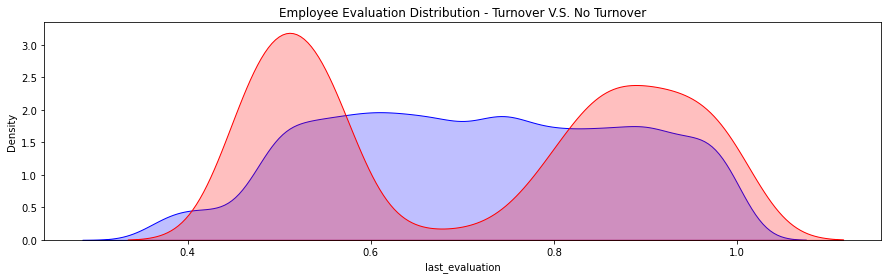

In [39]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(hr.loc[(hr['left'] == 0),'last_evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(hr.loc[(hr['left'] == 1),'last_evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

# Turnover V.S. AverageMonthlyHours

Summary:

Another bi-modal distribution for employees that turnovered

Employees who had less hours of work (~150hours or less) left the company more

Employees who had too many hours of work (~250 or more) left the company

Employees who left generally were underworked or overworked.

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

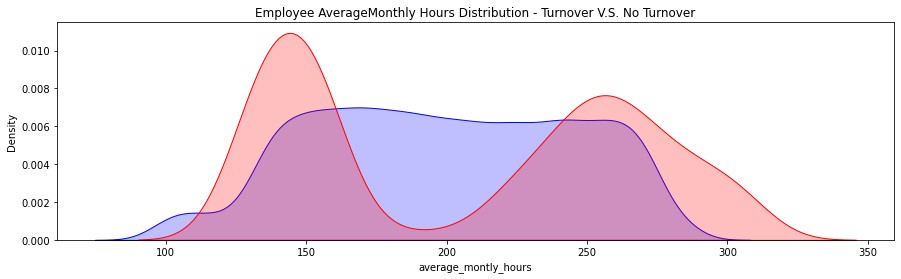

In [40]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(hr.loc[(hr['left'] == 0),'average_montly_hours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(hr.loc[(hr['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

# Turnover V.S. Satisfaction

Summary:

There is a tri-modal distribution for employees that turnovered
Employees who had really low satisfaction levels (0.2 or less) left the company more
Employees who had low satisfaction levels (0.3~0.5) left the company more
Employees who had really high satisfaction levels (0.7 or more) left the company more

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

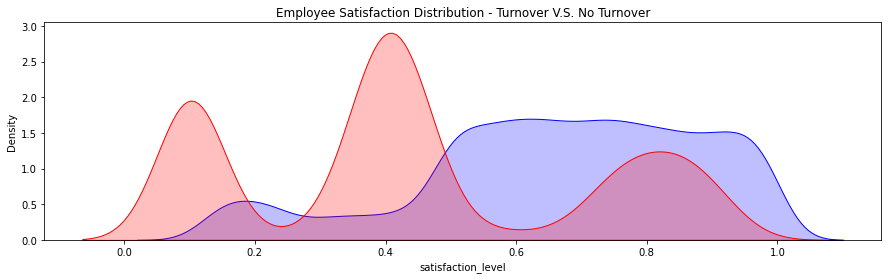

In [41]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(hr.loc[(hr['left'] == 0),'satisfaction_level'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(hr.loc[(hr['left'] == 1),'satisfaction_level'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

# ProjectCount VS AverageMonthlyHours

Summary:

As project count increased, so did average monthly hours

Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not.

Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects

In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects

Stop and Think:

What could be the meaning for this?

Why is it that employees who left worked more hours than employees who didn't, even with the same project count?

<AxesSubplot:xlabel='number_project', ylabel='average_montly_hours'>

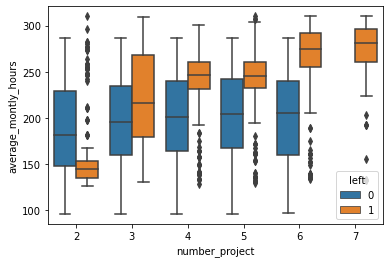

In [42]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="number_project", y="average_montly_hours", hue="left", data=hr)

# ProjectCount VS Evaluation

Summary: This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There is an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts.

Questions to think about:

**Why is it that employees who left, had on average, a higher evaluation than employees who did not leave, even with an increase in project count? **
Shouldn't employees with lower evaluations tend to leave the company more?

<AxesSubplot:xlabel='number_project', ylabel='last_evaluation'>

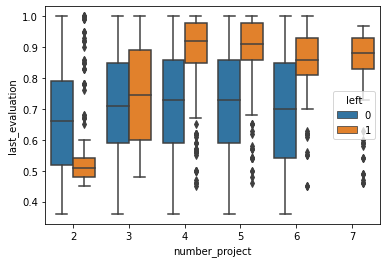

In [43]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
import seaborn as sns
sns.boxplot(x="number_project", y="last_evaluation", hue="left", data=hr)

# Satisfaction VS Evaluation

Summary: This is by far the most compelling graph. This is what I found:

There are 3 distinct clusters for employees who left the company

Cluster 1 (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.

Question: What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

Cluster 2 (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

Question: Could this cluster mean employees who "under-performed"?

Cluster 3 (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

Question: Could this cluser mean that employees left because they found another job opportunity?

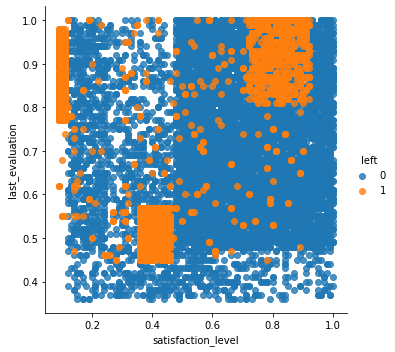

In [44]:
sns.lmplot(x='satisfaction_level', y='last_evaluation', data=hr,
           fit_reg=False, # No regression line
           hue='left')

# Turnover V.S. YearsAtCompany

Summary: Let's see if theres a point where employees start leaving the company. Here's what I found:

More than half of the employees with 4 and 5 years left the company

Employees with 5 years should highly be looked into

Stop and Think:

Why are employees leaving mostly at the 3-5 year range?

Who are these employees that left?

Are these employees part-time or contractors?

[Text(0, 0.5, 'Percent')]

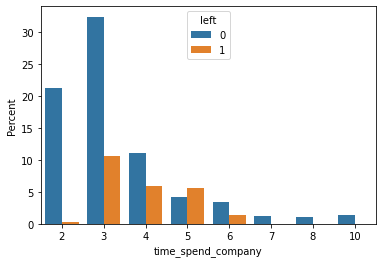

In [45]:
ax = sns.barplot(x="time_spend_company", y="time_spend_company", hue="left", data=hr, estimator=lambda x: len(x) / len(hr) * 100)
ax.set(ylabel="Percent")

Summary 

Employees generally left when they are underworked (less than 150hr/month or 6hr/day)

Employees generally left when they are overworked (more than 250hr/month or 10hr/day)

Employees with either really high or low evaluations should be taken into consideration for high turnover rate

Employees with low to medium salaries are the bulk of employee turnover

Employees that had 2,6, or 7 project count was at risk of leaving the company

Employee satisfaction is the highest indicator for employee turnover.

Employee that had 4 and 5 yearsAtCompany (time_spend_company) should be taken into consideration for high turnover rate

Employee satisfaction_level, yearsAtCompany (time_spend_company), and last_evaluation were the three biggest factors in determining turnover.